In [24]:
import numpy as np
import matplotlib.pyplot  as plt
import math 

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [26]:
x = np.genfromtxt('trajectory_file')#, dtype= None, delimiter= None)

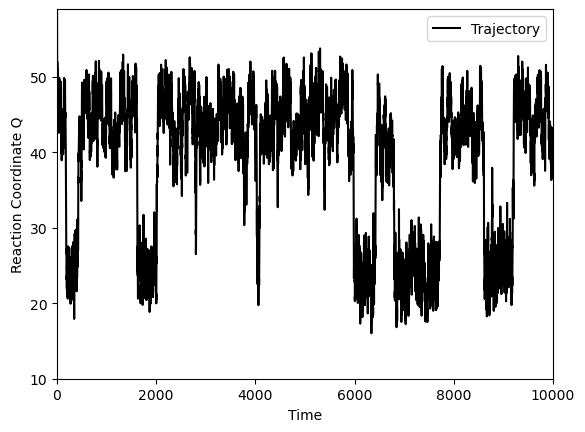

In [27]:
fig, ax = plt.subplots()
ax.plot(x, color= 'black', label = 'Trajectory') 
plt.xlabel('Time')
plt.ylabel('Reaction Coordinate Q')
plt.ylim([10, 59])
plt.xlim([0, 10000])
plt.legend()
plt.show()

In [47]:
# calculo da probabilidade condicional

def compZh(x,dx,dt=1):
    zh={}
    for x in x:
        x=int(x/dx)*dx # pegamos o valor inteiro da divisão coord x por dx e mult por dx 
#         print(x)
        zh[x]=zh.get(x,0)+1 
    for x in zh:zh[x]=(float(zh[x])/dt)/dx
    return zh

TP = compZh(x,dx=0.1,dt=1)

TPx = list(TP.keys())
TPy = list(TP.values())

X = np.asarray(TPx)
Y = np.asarray(TPy)

# total =  np.stack((X, Y), axis=-1)
# np.savetxt("pTP", total, fmt="%10.6f")

# print(Y)

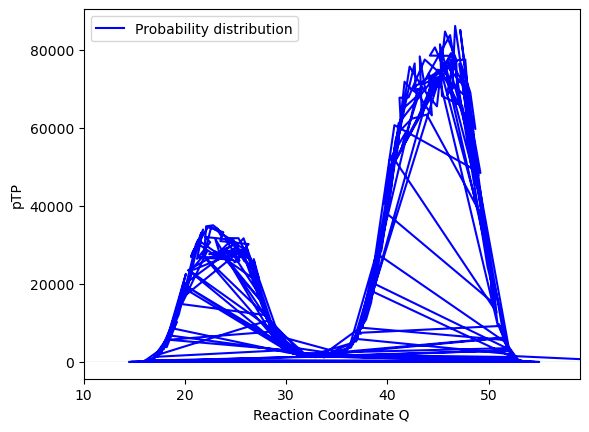

In [48]:
fig, ax = plt.subplots()
ax.plot(X, Y, color= 'blue', label = 'Probability distribution') 
plt.xlabel('Reaction Coordinate Q')
plt.ylabel('pTP')
plt.xlim([10, 59])
# plt.ylim([0, 10000])
# plt.fill(x)
plt.legend()
plt.show()

A função Compilação ZH calcula uma distribuição de probabilidade condicional. Ela recebe uma lista x, um valor dx e um valor de tempo dt (com um valor padrão de 1). Essa função itera sobre os valores em x, arredondando cada valor para o menor múltiplo de dx e então contabiliza a frequência desses valores em um dicionário zh. Posteriormente, divide esses valores pela quantidade total de tempo e pelo tamanho do intervalo dx para obter a distribuição de probabilidade. (A probabilidade de equilíbrio da coordenada de reação)

In [29]:
def compptpx(lx,dx,x0,x1):
    zheq=compZh(lx,dx)
    zhtp={}
#     ltpx=[]
    def addZh(zh,ltpx):
        for x in ltpx:
            x=int(x/dx)*dx
            zh[x]=zh.get(x,0)+1
    b=3
    if x0>x1:x0,x1=x1,x0
    for x in lx:
        ltpx.append(x)
    if b==3:
        if x<=x0:b=0
        if x>=x1:b=1
    if x<=x0:
        if b==1: addZh(zhtp,ltpx)
        b=0
        ltpx=[]
    if x>=x1:
        if b==0: addZh(zhtp,ltpx)
        b=1
        ltpx=[]
    ptpx=[]
    for x in zheq:
        ptpx.append((x,float(zhtp.get(x,0))/dx/zheq[x]))
        ptpx.sort()
    return ptpx

# lxy=compptpx(x,dx=0.1,x0=20,x1=50)
# lxy.sort()

pTP = compZh(x,dx=0.1,dt=1)

pTPx = list(pTP.keys())
pTPy = list(pTP.values())

X = np.asarray(pTPx)
Y = np.asarray(pTPy)

# def cal(x0=None,x1=None,dx=0.1,)
# if ptpx==1:
#     lxy=compptpx(lx,dx,x0,x1)
#         lxy.sort()
#         if writexy==1:writeXY(lxy,'%s.ptpx.xy' %(nameout))
#         lg.append(Gnuplot.Data(lxy, with_='lines lw 5', title='%s p(TP|x)' %nameout, axes= 'x1y2'))
#         g('set y2tics \n set ytics nomirror')
#         g('set y2label \'ptpx\' ')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

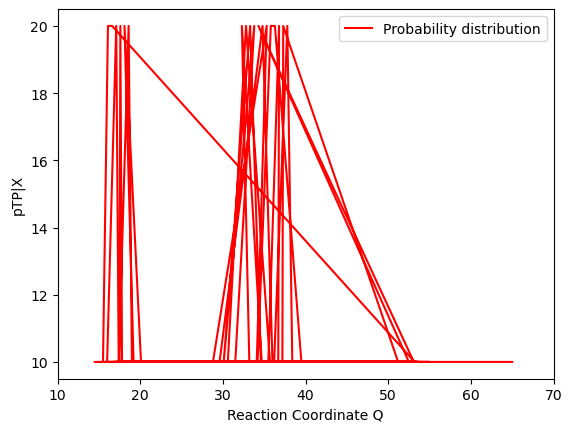

In [70]:
fig, ax = plt.subplots()
ax.plot(x, y, color= 'red', label = 'Probability distribution') 
plt.xlabel('Reaction Coordinate Q')
plt.ylabel('pTP|X')
# plt.ylim([10, 70])
plt.xlim([10, 70])
plt.legend()
plt.show()

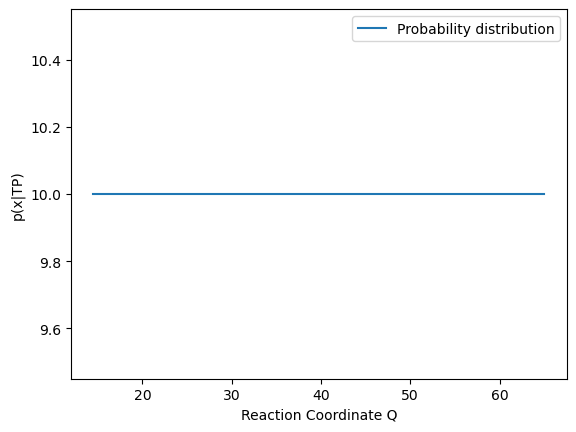

In [15]:
fig, ax = plt.subplots()
ax.plot(x, y, label = 'Probability distribution') 
plt.xlabel('Reaction Coordinate Q')
plt.ylabel('p(x|TP)')
# plt.ylim([10, 70])
# plt.xlim([10, 70])
plt.legend()
plt.show()

Já a função compptpx parece estar calculando o p(TP∣x). Ela recebe uma lista lx, um valor dx, dois valores de corte x0 e x1. A função organiza a lista lx em intervalos definidos por x0 e x1, contabiliza a frequência dos valores nesses intervalos e, em seguida, calcula a probabilidade condicional p(TP∣x) para cada intervalo.

In [31]:
# Function to calculate the conditional probability p(TP|x)

def distribution_pTP(TP, itc_x):
    return itc_x/x

def distribution_itc_pTP(TP, itc_x):
    return TP*x

# Probability of TP occurring
TP = 0.5

# Probability of the intersection of TP and x occurring
itc_x = 0.5

# Calculating the conditional probability of TP given x
p_TP_x = distribution_pTP(TP, itc_x)

# Calculating the conditional probability of intersection
p_TP = distribution_itc_pTP(TP, itc_x)

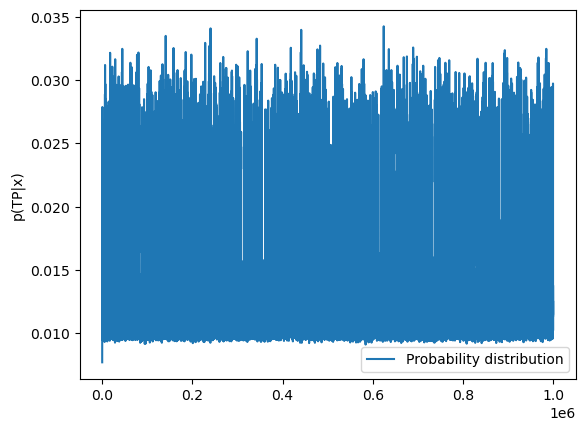

In [24]:
fig, ax = plt.subplots()
ax.plot(p_TP_x, label = 'Probability distribution') 
plt.ylabel('p(TP|x)')
plt.legend()
plt.show()

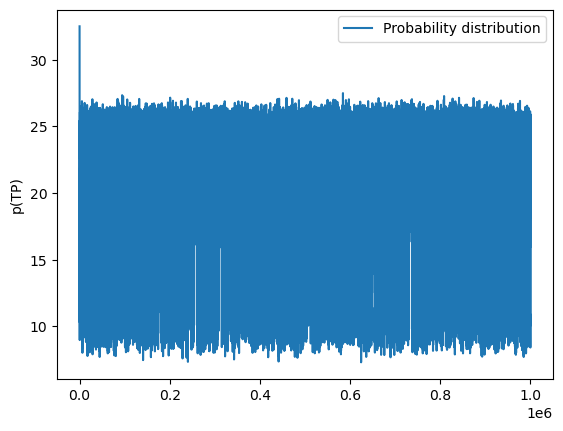

In [30]:
fig, ax = plt.subplots()
ax.plot(p_TP, label = 'Probability distribution') 
plt.ylabel('p(TP)')
plt.legend()
plt.show()